# بسم الله الرحمن الرحيم

## importing libraries

In [1]:
# Importing libraries and adjusting plotting settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pywaffle import Waffle
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

## Reading the dataset

In [2]:
df = pd.read_csv('../Dataset/heart diseases.csv')

# Preprocessing

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Checking nulls

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Checking Duplicates
- It is obvious that there are duplicate records because almost all features are categorical and there is a chance that two records share the same values across all features

In [6]:
print(f'Number of duplicated recrods = {df.duplicated().sum()}')

Number of duplicated recrods = 18078


## Checking Outliers
-The only column could have outliers is BMI, and its values ranging from 12-94.8 which is a real range and we can can consider not outliers on it

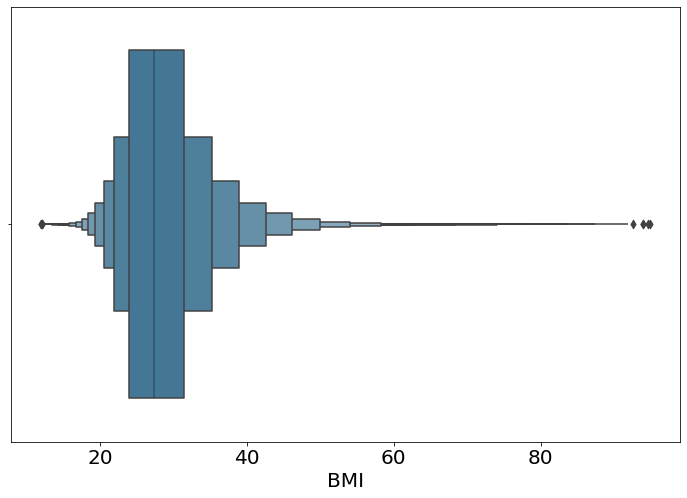

In [7]:
plt.figure(figsize=(12,8))
sns.boxenplot(x=df.BMI, palette='mako')
plt.show()

## Binning BMI for better insights

In [8]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [9]:
df['BMICategory'].value_counts()

Overweight (25.0 <= BMI < 30.0)       114355
Normal weight (18.5 <= BMI < 25.0)     97778
Obese (30.0 <= BMI < 35.0)             61169
Extremly Obese (BMI >= 35.0)           41379
Underweight (BMI < 18.5)                5114
Name: BMICategory, dtype: int64

## Encoding Categorical variables

- Encoding features with no ordering by one-hot encoding
- Endocing features with ordering by label encoding

In [10]:
order_cols = ["BMICategory", "AgeCategory", "HeartDisease"]
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

## Imbalancing problem
- The data suffers from imbalancing problem with 91 to 9 ratio

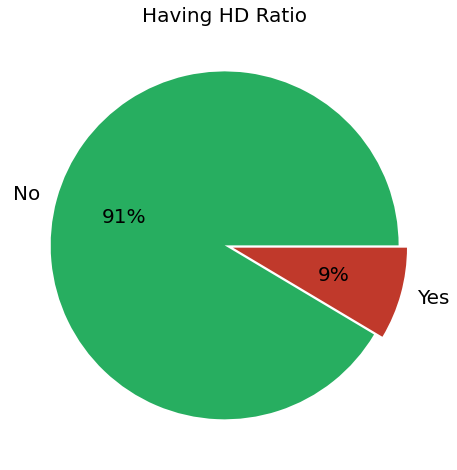

In [11]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

### Oversampling using SMOTE

In [12]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [13]:
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

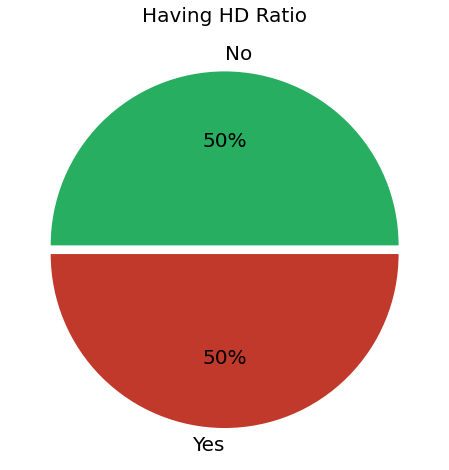

In [14]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(Y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

In [15]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

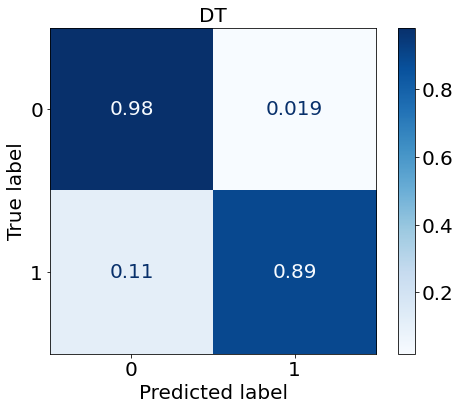

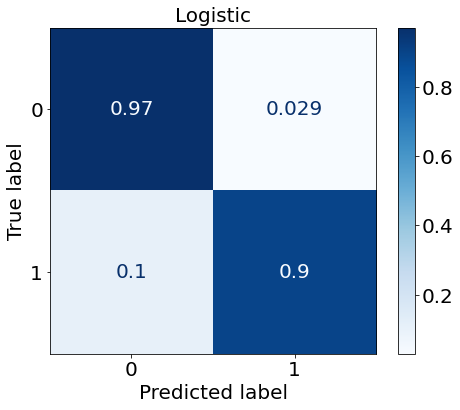

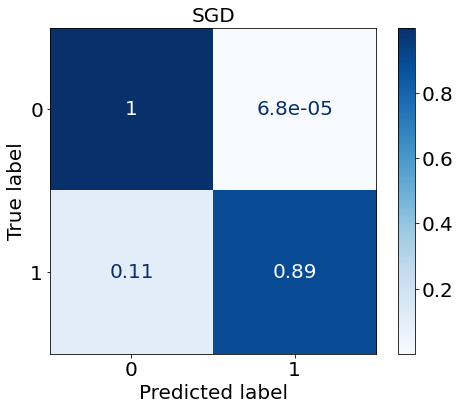

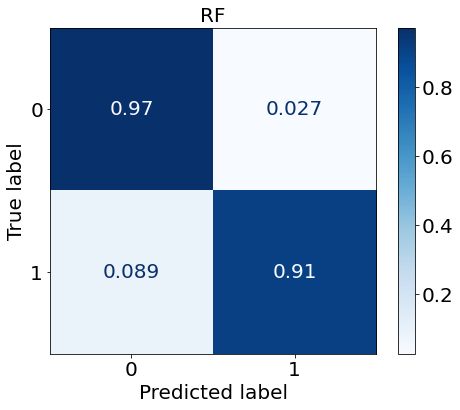

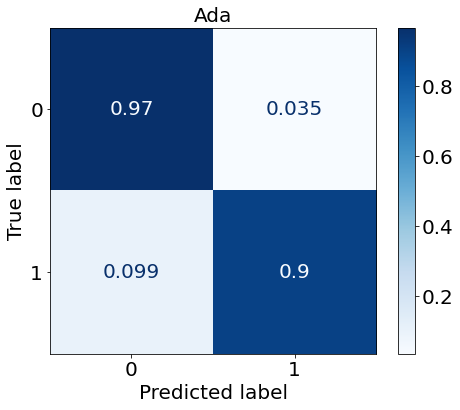

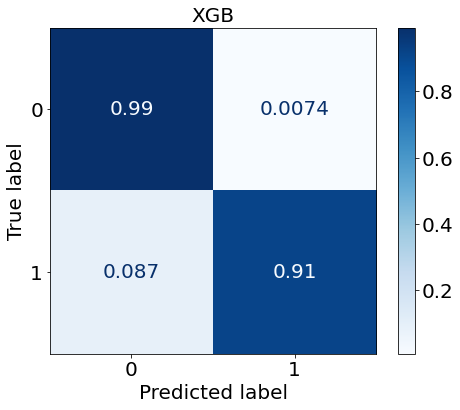

In [16]:
test_models(X_train, X_test, y_train, y_test)

In [17]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,0.943,0.934,88.74,97.92,93.10
1,Logistic,0.933,0.934,89.72,96.84,93.15
2,SGD,0.946,0.946,89.27,99.99,94.33
3,RF,0.947,0.942,91.08,97.07,93.98
4,Ada,0.932,0.933,90.07,96.27,93.07
5,XGB,0.954,0.953,91.26,99.20,95.06


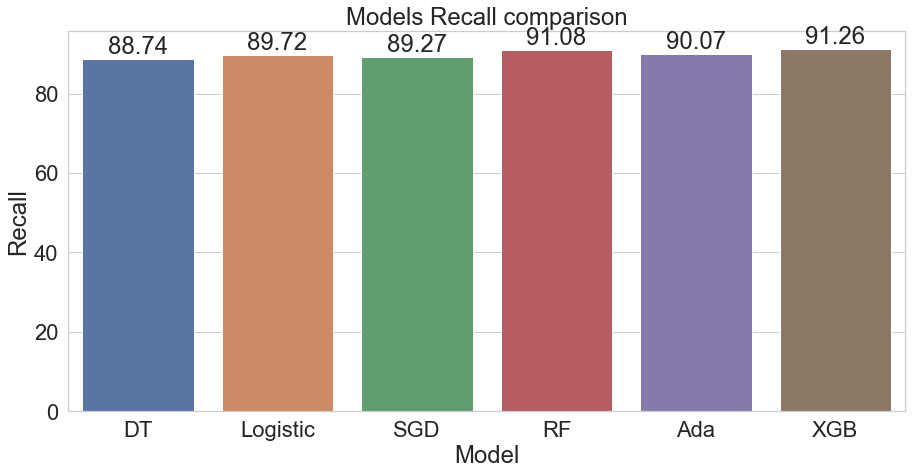

In [18]:
plt.figure(figsize=(15, 7))
sns.set_theme(style="whitegrid", font_scale=2)
ax = sns.barplot(x='Model', y="Recall", data=results)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
fig.show()

In [25]:
# results = pd.DataFrame(columns=['Train Score','Test Score','Recall','Precision','f1-score'])

def fit_model_result(x_train, x_test, y_train, y_test, model):
    # Modelling
    reg = model
    reg.fit(x_train,y_train)
    
    # Getting evaluation results
    y_pred = reg.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=5, output_dict=True)
    recall = round(report['weighted avg']['recall']*100, 2)
    precision = round(report['weighted avg']['precision']*100, 2)
    f1 = round(report['weighted avg']['f1-score']*100,2)
    test_score = round(report['accuracy']*100,2)
    train_score = round(reg.score(x_train,y_train)*100,2)
    
    # Printing results
#     results.loc[len(results.index)] = [train_score, test_score, recall, precision, f1]
    print(metrics.classification_report(y_test, y_pred, digits=5))
    
    # Displaying confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    metrics.plot_confusion_matrix(reg, x_test, y_test, cmap='Blues', normalize='true',ax=ax, display_labels=['No HD','HD'])
    plt.show()
    return reg

              precision    recall  f1-score   support

           0    0.91903   0.99263   0.95441     73105
           1    0.99199   0.91255   0.95061     73106

    accuracy                        0.95259    146211
   macro avg    0.95551   0.95259   0.95251    146211
weighted avg    0.95551   0.95259   0.95251    146211



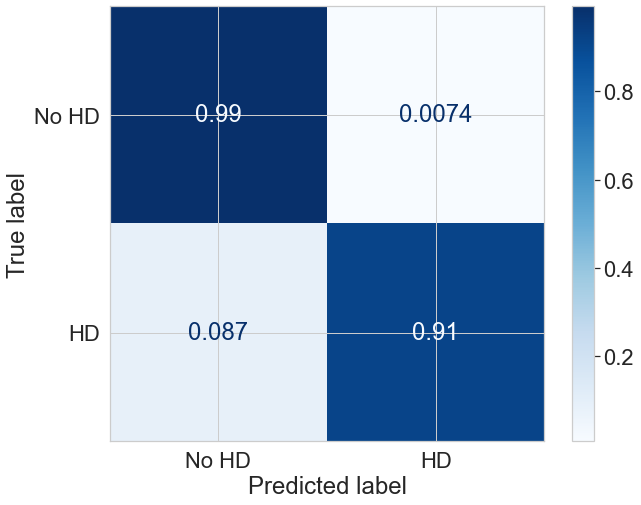

In [26]:
model = fit_model_result(X_train, X_test, y_train, y_test,XGBClassifier(random_state=2022))

In [21]:
score = cross_val_score(XGBClassifier(random_state=2022),X, Y, cv=6,scoring='recall_macro')

In [24]:
score.mean()

0.9461617114991349

In [50]:
import joblib

In [51]:
joblib.dump(model, 'XGB.pkl')

['XGB.pkl']

In [ ]:
model.predict_proba

# الحمدلله